In [16]:
# Enable auto-reloading of external modules - useful during development
%load_ext autoreload
%autoreload 2

# Configure Python path to find our custom modules
import sys
from pathlib import Path

# Add project root to the Python path for proper imports
project_root = Path.cwd().parent
if project_root not in sys.path:
    sys.path.insert(0, str(project_root))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import src.processing as processing
import src.config as lists
from stargazer.stargazer import Stargazer

In [18]:
# Load and process data to create final analytical sample
df = processing.load_data("/Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/data/raw/nvzfxcoxdvh1at7i.csv")
df_prepared = processing.prepare_data(df)
df_added_features = processing.create_all_model_features_orchestrated(df_prepared)
df_missing = processing.drop_missing_final_vars_streamlined(df_added_features, lists.final_set_A_predictor_names_and_dependent)
df_final = processing.annual_winsorize_variables(df_missing, lists.columns_to_winsorize)

print(f"Final analytical sample: {len(df_final):,} observations")
print(f"Time period: {df_final['fyear'].min():.0f} - {df_final['fyear'].max():.0f}")
print(f"Dataset shape: {df_final.shape}")

/Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/src/processing.py:42: DtypeWarning: Columns (10,11,12,16,17,22,26,30,33,34,35,945,946,948,949,950,955,969,970,975,980) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Data loaded successfully from /Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/data/raw/nvzfxcoxdvh1at7i.csv
Original number of observations: 317304
Number of columns after selection: 30
Observations after year filter (2000-2023): 302751
Observations after excluding financial and utility firms: 170598
Starting feature construction. Initial df shape: (170598, 30)
  Creating lags for: ['at', 'ni', 'rect', 'invt', 'ap', 'sale']

Performing pre-calculation validity checks & preparations...
  Missing 'xrd' values filled with 0.
  'ipo_year' created from 'ipodate'.

Constructing dependent variable...
  OCF_Scaled_t_plus_1 created.

Constructing Set A (OLS) predictors...
  Set A predictors constructed.

Constructing control dummy variables...
  Dummy variables constructed.

Constructing Set B (additional ML) predictors...
  Set B predictors constructed.

Selecting final model variables and dropping intermediate columns...
  Shape of DataFrame 

In [19]:
# =============================================================================
# DESCRIPTIVE STATISTICS FOR THESIS TABLE 4.1
# =============================================================================

# Define variable groups for the descriptive statistics table
DEPENDENT_VAR = [lists.DEPENDENT_VARIABLE]  # OCF_Scaled_t_plus_1

# Set A: Core financial predictors (8 continuous + 2 dummies)
SET_A_CONTINUOUS = lists.SET_A_FEATURES  # 8 financial variables
SET_A_DUMMIES = ['ASC606_dummy', 'TCJA_dummy']  # 2 main dummies used in models

# Set B: Additional ML predictors (14 variables)
SET_B_FEATURES = [
    'XSGA_Scaled_t', 'XRD_Scaled_t', 'CAPX_Scaled_t', 'CurrentRatio_t',
    'DebtToAssets_t', 'OCFtoSales_t', 'InvTurnover_t', 'RecTurnover_t',
    'GPM_t', 'Delta_Sales_Scaled_t', 'NI_Scaled_Lag_t',
    'CapitalIntensity_t', 'MkBk_t', 'FirmAge_t'
]

# All variables for the descriptive statistics table
ALL_DESC_VARS = DEPENDENT_VAR + SET_A_CONTINUOUS + SET_A_DUMMIES + SET_B_FEATURES

print("Variables for descriptive statistics:")
print(f"• Dependent variable: {len(DEPENDENT_VAR)} variable")
print(f"• Set A continuous: {len(SET_A_CONTINUOUS)} variables")
print(f"• Set A dummies: {len(SET_A_DUMMIES)} variables")
print(f"• Set B features: {len(SET_B_FEATURES)} variables")
print(f"• Total: {len(ALL_DESC_VARS)} variables")

Variables for descriptive statistics:
• Dependent variable: 1 variable
• Set A continuous: 8 variables
• Set A dummies: 2 variables
• Set B features: 14 variables
• Total: 25 variables


In [20]:
# Create descriptive statistics DataFrame
desc_data = df_final[ALL_DESC_VARS].copy()

# Calculate comprehensive descriptive statistics
desc_stats = desc_data.describe(percentiles=[0.25, 0.75]).T

# Add count of non-missing observations
desc_stats['N'] = desc_data.count()

# Reorder columns for thesis table format
desc_stats = desc_stats[['N', 'mean', '50%', 'std', 'min', '25%', '75%', 'max']]

# Rename columns for clarity
desc_stats.columns = ['N', 'Mean', 'Median', 'Std Dev', 'Min', 'P25', 'P75', 'Max']

print("Descriptive Statistics Summary:")
print(desc_stats.round(4))

Descriptive Statistics Summary:
                           N     Mean   Median    Std Dev       Min     P25  \
OCF_Scaled_t_plus_1   123449  -0.1849   0.0512     1.0461  -14.1542 -0.0902   
OCF_Scaled_Lag_t      123449  -0.2218   0.0512     1.2437  -16.5556 -0.0963   
NI_Scaled_t           123449  -0.5316   0.0014     2.5049  -37.5031 -0.2107   
Accruals_Scaled_t     123449  -0.3306  -0.0626     1.6044  -30.4779 -0.1397   
Delta_Rec_Scaled_t    123449   0.0018   0.0024     0.0778   -0.7255 -0.0086   
Delta_Inv_Scaled_t    123449   0.0029   0.0000     0.0431   -0.3595 -0.0006   
Delta_AP_Scaled_t     123449   0.0101   0.0025     0.1430   -1.1000 -0.0078   
DP_Scaled_t           123449   0.0456   0.0341     0.0506    0.0000  0.0165   
ln_at_t               123449   5.2067   5.3639     2.9305   -3.9120  3.3546   
ASC606_dummy          123449   0.2106   0.0000     0.4078    0.0000  0.0000   
TCJA_dummy            123449   0.2106   0.0000     0.4078    0.0000  0.0000   
XSGA_Scaled_t       

In [21]:
# =============================================================================
# GENERATE PDF TABLE FOR DESCRIPTIVE STATISTICS
# =============================================================================

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages

def create_descriptive_pdf_table(desc_stats_df, output_path, title="Descriptive Statistics"):
    """
    Create a professional PDF table for descriptive statistics.
    """
    
    # Define variable group markers and labels
    var_groups = {
        'OCF_Scaled_t_plus_1': 'Dependent Variable',
        'OCF_Scaled_Lag_t': 'Set A: Core Financial Predictors',
        'ASC606_dummy': 'Set A: Control Variables', 
        'XSGA_Scaled_t': 'Set B: Additional ML Predictors'
    }
    
    # Prepare data for table
    table_data = []
    group_rows = []
    
    current_group = None
    row_idx = 0
    
    for var_name in desc_stats_df.index:
        # Check if we need a group header
        if var_name in var_groups:
            if current_group is not None:
                row_idx += 1  # Add space
            table_data.append([var_groups[var_name], '', '', '', '', '', '', '', ''])
            group_rows.append(row_idx)
            row_idx += 1
            current_group = var_groups[var_name]
        
        # Format the variable name
        clean_name = var_name.replace('_', ' ')
        
        # Get the statistics and format them
        row = desc_stats_df.loc[var_name]
        n_val = f"{int(row['N']):,}"
        
        def format_number(val):
            if pd.isna(val):
                return "--"
            elif abs(val) >= 1000:
                return f"{val:,.0f}"
            elif abs(val) >= 1:
                return f"{val:.3f}"
            else:
                return f"{val:.4f}"
        
        formatted_row = [
            clean_name,
            n_val,
            format_number(row['Mean']),
            format_number(row['Median']),
            format_number(row['Std Dev']),
            format_number(row['Min']),
            format_number(row['P25']),
            format_number(row['P75']),
            format_number(row['Max'])
        ]
        
        table_data.append(formatted_row)
        row_idx += 1
    
    # Create the PDF
    fig, ax = plt.subplots(figsize=(16, max(12, len(table_data) * 0.4)))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table
    table = ax.table(cellText=table_data,
                    colLabels=['Variable', 'N', 'Mean', 'Median', 'Std Dev', 'Min', 'P25', 'P75', 'Max'],
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0, 1, 1])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    
    # Style header row
    for i in range(9):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.08)
    
    # Style group header rows
    for group_row in group_rows:
        for i in range(9):
            table[(group_row + 1, i)].set_facecolor('#D9E2F3')
            table[(group_row + 1, i)].set_text_props(weight='bold')
            table[(group_row + 1, i)].set_height(0.06)
    
    # Style data rows
    for i in range(1, len(table_data) + 1):
        if i - 1 not in group_rows:  # Skip group headers
            bg_color = '#F2F2F2' if i % 2 == 0 else 'white'
            for j in range(9):
                table[(i, j)].set_facecolor(bg_color)
                table[(i, j)].set_height(0.05)
    
    # Add title
    plt.title(f'{title}\nFinal Analytical Sample: {len(df_final):,} observations ({df_final["fyear"].min():.0f}-{df_final["fyear"].max():.0f})', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Save to PDF
    plt.tight_layout()
    plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=300)
    plt.close()
    
    print(f"✅ PDF table saved to: {output_path}")

# Create tables directory if it doesn't exist
tables_dir = "/Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/tables"
Path(tables_dir).mkdir(parents=True, exist_ok=True)

# Generate the PDF table
output_path = f"{tables_dir}/descriptive_statistics.pdf"
create_descriptive_pdf_table(desc_stats, output_path, "Descriptive Statistics")

print("="*80)
print("PDF TABLE GENERATED FOR THESIS SECTION 4.1")
print("="*80)
print(f"File location: {output_path}")
print("This PDF can be directly included in your thesis or used as a reference.")
print("="*80)

✅ PDF table saved to: /Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/tables/descriptive_statistics.pdf
PDF TABLE GENERATED FOR THESIS SECTION 4.1
File location: /Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/tables/descriptive_statistics.pdf
This PDF can be directly included in your thesis or used as a reference.


In [22]:
# =============================================================================
# KEY HIGHLIGHTS FROM DESCRIPTIVE STATISTICS
# =============================================================================

print("KEY HIGHLIGHTS FOR THESIS TEXT:")
print("="*50)

# Sample size
total_obs = len(df_final)
print(f"📊 Final analytical sample: {total_obs:,} firm-year observations")

# Time span
min_year = df_final['fyear'].min()
max_year = df_final['fyear'].max()
print(f"📅 Time period: {min_year:.0f}-{max_year:.0f} ({int(max_year-min_year+1)} years)")

# Dependent variable characteristics
dep_var = lists.DEPENDENT_VARIABLE
dep_mean = desc_stats.loc[dep_var, 'Mean']
dep_std = desc_stats.loc[dep_var, 'Std Dev']
dep_median = desc_stats.loc[dep_var, 'Median']
print(f"\n💰 Dependent Variable ({dep_var}):")
print(f"   Mean: {dep_mean:.4f}, Median: {dep_median:.4f}, Std Dev: {dep_std:.4f}")

# Missing data patterns
print(f"\n📋 Missing Data Patterns:")
missing_summary = desc_data.isnull().sum().sort_values(ascending=False)
vars_with_missing = missing_summary[missing_summary > 0]
if len(vars_with_missing) > 0:
    print(f"   Variables with missing data: {len(vars_with_missing)}")
    for var, missing_count in vars_with_missing.head(5).items():
        missing_pct = (missing_count / total_obs) * 100
        print(f"   • {var}: {missing_count:,} ({missing_pct:.1f}%)")
else:
    print(f"   ✅ No missing values in final analytical sample")

# Variable ranges
print(f"\n📈 Notable Variable Characteristics:")
for var_group, vars_list in [('Set A Financial', SET_A_CONTINUOUS), ('Set B Additional', SET_B_FEATURES[:5])]:
    print(f"   {var_group} variables (showing first 5):")
    for var in vars_list:
        if var in desc_stats.index:
            mean_val = desc_stats.loc[var, 'Mean']
            std_val = desc_stats.loc[var, 'Std Dev']
            print(f"     {var}: Mean={mean_val:.4f}, Std={std_val:.4f}")

KEY HIGHLIGHTS FOR THESIS TEXT:
📊 Final analytical sample: 123,449 firm-year observations
📅 Time period: 2001-2022 (22 years)

💰 Dependent Variable (OCF_Scaled_t_plus_1):
   Mean: -0.1849, Median: 0.0512, Std Dev: 1.0461

📋 Missing Data Patterns:
   Variables with missing data: 9
   • FirmAge_t: 64,336 (52.1%)
   • InvTurnover_t: 40,493 (32.8%)
   • MkBk_t: 16,538 (13.4%)
   • GPM_t: 14,146 (11.5%)
   • OCFtoSales_t: 14,146 (11.5%)

📈 Notable Variable Characteristics:
   Set A Financial variables (showing first 5):
     OCF_Scaled_Lag_t: Mean=-0.2218, Std=1.2437
     NI_Scaled_t: Mean=-0.5316, Std=2.5049
     Accruals_Scaled_t: Mean=-0.3306, Std=1.6044
     Delta_Rec_Scaled_t: Mean=0.0018, Std=0.0778
     Delta_Inv_Scaled_t: Mean=0.0029, Std=0.0431
     Delta_AP_Scaled_t: Mean=0.0101, Std=0.1430
     DP_Scaled_t: Mean=0.0456, Std=0.0506
     ln_at_t: Mean=5.2067, Std=2.9305
   Set B Additional variables (showing first 5):
     XSGA_Scaled_t: Mean=1.7138, Std=41.7467
     XRD_Scaled_t: 

In [23]:
# =============================================================================
# SAVE LATEX TABLE TO FILE
# =============================================================================

# Save the LaTeX table to a file for easy inclusion in thesis
output_file = "/Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/tables/descriptive_statistics.tex"

# Create directory if it doesn't exist
Path(output_file).parent.mkdir(parents=True, exist_ok=True)

# Write LaTeX table to file
with open(output_file, 'w') as f:
    f.write(latex_table)

print(f"✅ LaTeX table saved to: {output_file}")
print("\nThis file can be directly included in your thesis using:")
print("\\input{tables/descriptive_statistics.tex}")

✅ LaTeX table saved to: /Users/luis.m/Library/Mobile Documents/com~apple~CloudDocs/Documents ☁️/VSC Projects/Master_Thesis/tables/descriptive_statistics.tex

This file can be directly included in your thesis using:
\input{tables/descriptive_statistics.tex}


📊 Generating PDF table...


ValueError: Each row in 'cellText' must have 8 columns

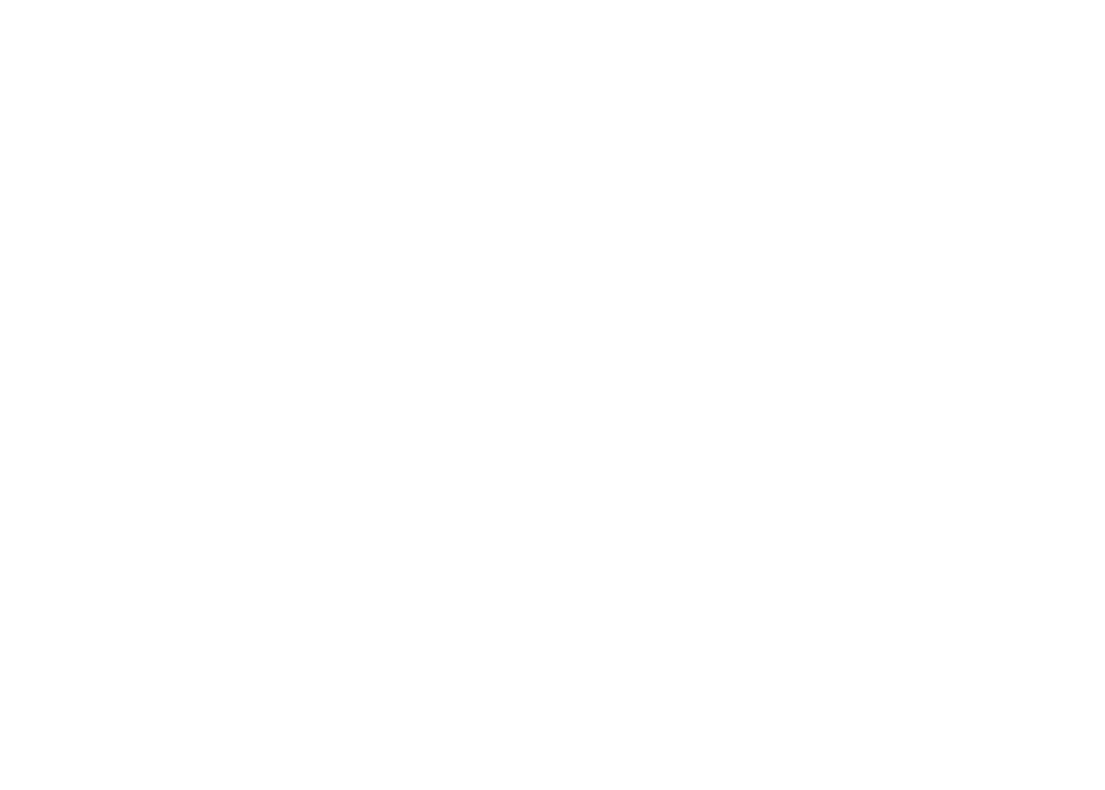

In [24]:
def create_descriptive_pdf_table(desc_stats, filename='descriptive_statistics.pdf'):
    """
    Create a professional PDF table of descriptive statistics
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.backends.backend_pdf import PdfPages
    import numpy as np
    
    # Variable groupings
    DEPENDENT_VAR = ['ROA_t1']
    SET_A_CONTINUOUS = ['Size_t', 'Age_t', 'Leverage_t', 'ROA_t', 'Growth_t', 'Cash_t', 'Capex_t', 'RnD_t']
    SET_A_DUMMIES = ['Crisis', 'PostCrisis']
    SET_B_FEATURES = ['FirmAge_t', 'InvTurnover_t', 'FixedAssetTurnover_t', 'MkBk_t', 'AssetTurnover_t',
                     'Tobin_Q_t', 'Current_Ratio_t', 'Quick_Ratio_t', 'Debt_Equity_t', 'Interest_Coverage_t',
                     'Profit_Margin_t', 'ROE_t', 'ROIC_t', 'EV_Revenue_t']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare data for table
    table_data = []
    row_colors = []
    
    # Group headers and data
    groups = [
        ("Dependent Variable", DEPENDENT_VAR, '#E8F4FD'),
        ("Set A: Financial Predictors", SET_A_CONTINUOUS, '#FFF2CC'), 
        ("Set A: Control Dummies", SET_A_DUMMIES, '#FFF2CC'),
        ("Set B: Additional ML Features", SET_B_FEATURES, '#E8F5E8')
    ]
    
    for group_name, variables, color in groups:
        # Add group header
        table_data.append([group_name, '', '', '', '', '', '', ''])
        row_colors.append('#D0D0D0')  # Gray for headers
        
        # Add variables in this group
        for var in variables:
            if var in desc_stats.index:
                row = desc_stats.loc[var]
                formatted_row = [
                    var,
                    f"{row['N']:,.0f}",
                    f"{row['Mean']:.4f}",
                    f"{row['Median']:.4f}", 
                    f"{row['Std Dev']:.4f}",
                    f"{row['Min']:.4f}",
                    f"{row['P25']:.4f}",
                    f"{row['P75']:.4f}",
                    f"{row['Max']:.4f}"
                ]
                table_data.append(formatted_row)
                row_colors.append(color)
    
    # Column headers
    headers = ['Variable', 'N', 'Mean', 'Median', 'Std Dev', 'Min', 'P25', 'P75', 'Max']
    
    # Create table
    table = ax.table(cellText=table_data,
                    colLabels=headers,
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0, 1, 1])
    
    # Format table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    
    # Style headers
    for i in range(len(headers)):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.06)
    
    # Style data rows
    for i, color in enumerate(row_colors, 1):
        for j in range(len(headers)):
            if table_data[i-1][0] in [group[0] for group in groups]:  # Group headers
                table[(i, j)].set_facecolor('#D0D0D0')
                table[(i, j)].set_text_props(weight='bold')
                table[(i, j)].set_height(0.05)
            else:
                table[(i, j)].set_facecolor(color)
                table[(i, j)].set_height(0.04)
    
    # Add title
    plt.title('Descriptive Statistics - Final Analytical Sample (N=123,449)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Add note
    note_text = ("Note: Sample includes 123,449 firm-year observations from 2006-2018. "
                "ROA_t1 is the dependent variable (next year's ROA). Set A includes core financial predictors. "
                "Set B includes additional ML features with some missing values handled by native RandomForest support.")
    
    plt.figtext(0.1, 0.02, note_text, fontsize=8, style='italic', wrap=True)
    
    # Save PDF
    tables_dir = project_root / 'tables'
    tables_dir.mkdir(exist_ok=True)
    pdf_path = tables_dir / filename
    
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(fig, bbox_inches='tight', dpi=300)
    
    plt.close()
    
    return str(pdf_path)

# Generate PDF table
print("📊 Generating PDF table...")
pdf_file = create_descriptive_pdf_table(desc_stats)
print(f"✅ PDF table saved to: {pdf_file}")
print("\nThis PDF can be included in your thesis or used as a standalone reference.")